In [3]:
import itertools


import numpy as np

#import jax.numpy as jnp
#import jax

#from jax.example_libraries import optimizers

from validphys.api import API
from validphys.fkparser import load_fktable
from validphys.commondataparser import load_commondata

/Users/manuelmorales/miniconda3/envs/simunet-dev/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
inp = {
    "fit": "NNPDF40_nnlo_as_01180_1000",
    "dataset_inputs": {"from_": "fit"},
    "use_cuts": "internal",
    "theoryid": 200
}

In [9]:
dir(data)

['_UserList__cast',
 '__abstractmethods__',
 '__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'append',
 'argnames',
 'as_markdown',
 'as_namespace',
 'clear',
 'comp_tuple',
 'copy',
 'count',
 'data',
 'datasets',
 'dsinputs',
 'extend',
 'fixed_observables',
 'foinputs',
 'index',
 'insert',
 'iterfixed',
 'load',
 'name',
 'nsitem',
 'nskey',
 'pop',
 'remove',
 'reverse',
 'sort',
 'thspec',
 'to_unweighted']

In [7]:
xx = []

excluded = set()

for ds in data.datasets:
    for fk in ds.fkspecs:
        xgrid = load_fktable(fk).xgrid
        
        if xgrid.shape != (50,):
            print("Excluding", ds)
            excluded.add(ds)
            continue
        else:
            xx.append(xgrid)

Excluding DYE886R_dw_ite
Excluding DYE886R_dw_ite
Excluding DYE886P
Excluding DYE605_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding DYE906R_dw_ite
Excluding CDFZRAP_NEW
Excluding D0ZRAP_40
Excluding D0ZRAP_40
Excluding D0WMASY
Excluding D0WMASY
Excluding ATLASWZRAP36PB
Excluding ATLASZHIGHMASS49FB
Excluding ATLASLOMASSDY11EXT
Excluding ATLASWZRAP11CC
Excluding ATLAS_WZ_TOT_13TEV
Excluding ATLAS_WP_JET_8TEV_PT
Excluding ATLAS_WM_JET_8TEV_PT
Excluding ATLASZPT8TEVMDIST
Excluding ATLASZPT8TEVYDIST
Excluding ATLASTTBARTOT7TEV
Excluding ATLASTTBARTOT8TEV

KeyboardInterrupt: 

In [5]:
arr = np.array(xx)

In [6]:
arr.std(axis=0).max()

1.3322676295501878e-15

In [7]:
datasets = [ds for ds in data.datasets if ds not in excluded]

In [8]:
fk = load_fktable(datasets[-1].fkspecs[-1])

In [9]:
fk.luminosity_mapping

array([ 1,  1,  1,  2,  1,  3,  1,  4,  1,  5,  1,  6,  1,  9,  1, 10,  1,
       11,  2,  2,  2,  3,  2,  4,  2,  5,  2,  6,  2,  9,  2, 10,  2, 11,
        3,  3,  3,  4,  3,  5,  3,  6,  3,  9,  3, 10,  3, 11,  4,  4,  4,
        5,  4,  6,  4,  9,  4, 10,  4, 11,  5,  5,  5,  6,  5,  9,  5, 10,
        5, 11,  6,  6,  6,  9,  6, 10,  6, 11,  9,  9,  9, 10,  9, 11, 10,
       10, 10, 11, 11, 11])

In [10]:
fk.sigma

15          16        17        18        19        20   \
data x1 x2                                                                   
0    0  0     0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
        1     0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
        2     0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
        3     0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
        4     0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
...                ...         ...       ...       ...       ...       ...   
16   49 45    0.000000 -541.888596 -0.028974  0.023911  0.007970 -0.007970   
        46    0.000000 -552.215759 -0.021690  0.022467  0.007489 -0.007489   
        47    0.000000 -423.142340 -0.025087  0.018254  0.006085 -0.006085   
        48    0.000000 -614.227990 -0.020103  0.046881  0.015627 -0.015627   
        49 -103.501968 -234.562136 -0.230873 -7.321969 -2.440656  2.440656   

                  23        24        25         30   ...       90        93   \
data x1 x2                                            ...                       
0    0  0    0.000000  0.000000  0.000000   0.000000  ...  0.000000  0.000000   
        1    0.000000  0.000000  0.000000   0.000000  ...  0.000000  0.000000   
        2    0.000000  0.000000  0.000000   0.000000  ...  0.000000  0.000000   
        3    0.000000  0.000000  0.000000   0.000000  ...  0.000000  0.000000   
        4    0.000000  0.000000  0.000000   0.000000  ...  0.000000  0.000000   
...               ...       ...       ...        ...  ...       ...       ...   
16   49 45  -0.976658 -0.325553  0.325553   0.000000  ...  0.000000  0.002600   
        46  -0.860740 -0.286913  0.286913   0.000000  ...  0.000000  0.002238   
        47  -0.609224 -0.203075  0.203075   0.000000  ...  0.000000  0.001579   
        48  -0.790201 -0.263400  0.263400   0.000000  ...  0.000000  0.001964   
        49  17.863439  5.954480 -5.954480 -39.255373  ...  0.004185 -0.000016   

                 94        95        135       136       137       150  \
data x1 x2                                                               
0    0  0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
16   49 45  0.000867  0.001783  0.000000 -0.001434 -0.000717  0.000000   
        46  0.000746  0.001412  0.000000 -0.000961 -0.000480  0.000000   
        47  0.000526  0.000975  0.000000 -0.000627 -0.000314  0.000000   
        48  0.000655  0.001108  0.000000 -0.000586 -0.000293  0.000000   
        49 -0.000005  0.000003 -0.022246 -0.000490 -0.000245 -0.007252   

                 151       165  
data x1 x2                      
0    0  0   0.000000  0.000000  
        1   0.000000  0.000000  
        2   0.000000  0.000000  
        3   0.000000  0.000000  
        4   0.000000  0.000000  
...              ...       ...  
16   49 45 -0.000239  0.000000  
        46 -0.000160  0.000000  
        47 -0.000105  0.000000  
        48 -0.000098  0.000000  
        49 -0.000082 -0.003789  

[42500 rows x 45 columns]

In [11]:
fk.get_np_fktable().shape

(17, 45, 50, 50)

In [12]:
ds = datasets[0]

In [13]:
from validphys import convolution
from validphys import covmats

import jax.scipy.linalg as jla


In [14]:
# TODO: Is this needed?
OP = {k: jax.jit(v) for k,v in convolution.OP.items()}

In [15]:
rng = jax.random.PRNGKey(0xDEADBEEF)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [16]:
#pdf_base = jax.random.normal(rng, shape=(14,50))

from validphys.pdfbases import evolution
from validphys.core import PDFSETS
pdf = PDFSETS.NNPDF40_nlo_as_01180
INPUT_GRID = evolution.grid_values(pdf, convolution.FK_FLAVOURS, xx[0], [1.65]).squeeze(-1)
weight_base_num = jax.random.normal(rng, shape=(INPUT_GRID.shape[0],))
weight_base = weight_base_num/jnp.sum(weight_base_num)

LHAPDF 6.4.0 loading all 101 PDFs in set NNPDF40_nlo_as_01180
NNPDF40_nlo_as_01180, version 1; 101 PDF members


In [17]:
def make_dis_prediction(fk):
    indices = fk.luminosity_mapping
    fk_arr = jnp.array(fk.get_np_fktable())
    @jax.jit
    def dis_prediction(pdf):
        return jnp.einsum("ijk, jk ->i", fk_arr, pdf[indices, :])
    return dis_prediction
    
    
def make_had_prediction(fk):
    indices = fk.luminosity_mapping
    first_indices = indices[0::2]
    second_indices = indices[1::2]
    fk_arr = jnp.array(fk.get_np_fktable())
    @jax.jit
    def had_prediction(pdf):
        return jnp.einsum("ijkl,jk,jl->i", fk_arr, pdf[first_indices,:], pdf[second_indices,:])
    return had_prediction


def make_pred(ds):
    
    pred_funcs = []
    
    for fkspec in ds.fkspecs:
        fk = load_fktable(fkspec).with_cuts(ds.cuts)
        if fk.hadronic:
            pred = make_had_prediction(fk)
        else:
            pred = make_dis_prediction(fk)
        pred_funcs.append(pred)
    @jax.jit
    def prediction(pdf):
        return OP[ds.op](*[f(pdf) for f in pred_funcs])
    
    return prediction
            
    

In [18]:
def make_chi2(ds):
    cd = load_commondata(ds.commondata).with_cuts(ds.cuts)

    central_value = jnp.array(cd.central_values)

    covmat = covmats.covmat_from_systematics(cd, dataset_input=ds)



    sqrt_covmat = jnp.array(covmats.sqrt_covmat(covmat))

    
    
    pred = make_pred(ds)
    
    
    @jax.jit
    def chi2(pdf):
        
        diff = pred(pdf) - central_value
        chi2_vec = jla.solve_triangular(sqrt_covmat, diff, lower=True)
        return jnp.sum(chi2_vec**2)
    
    return chi2

In [19]:
chi2_contribs = [make_chi2(ds) for ds in datasets]
    
    
    

In [20]:
#TODO: make this work compiled??
def loss_batch(pdf, contribs):
    return sum([cont(pdf) for cont in contribs])

In [21]:
@jax.jit
def loss(weights):
    pdf = jnp.einsum("i,ijk", weights, INPUT_GRID)
    return sum([cont(pdf) for cont in chi2_contribs])
    

In [22]:
loss(jnp.eye(1, 101)[0,:])

Array(5888.8696, dtype=float32)

In [23]:
loss(weight_base)

Array(5774.73, dtype=float32)

In [26]:
grad = jax.grad(loss)(weight_base);

In [67]:
import random

In [34]:
#batch_size = len(datasets)

momentum_mass = 0.9

step_size = 1e-8

num_epochs = 500

#num_complete_batches, leftover = divmod(len(chi2_contribs), batch_size)
#num_batches = num_complete_batches + bool(leftover)

opt_init, opt_update, get_params = optimizers.momentum(step_size, mass=momentum_mass)




In [35]:
#def batch_stream():
#    state = random.Random(0)
#    while True:
#        permutation = state.sample(chi2_contribs, len(chi2_contribs))
#        for i in range(num_batches):
#            yield permutation[i*batch_size: (i+1)*batch_size]

In [36]:
@jax.jit
def update(i, opt_state, 
          # batch
          ):
    params = get_params(opt_state)
    return opt_update(i, jax.grad(loss)(params, 
                      #                  batch
                                       ), 
                      opt_state)

In [37]:
#batch_iter = batch_stream()
opt_counter = itertools.count()
opt_state = opt_init(weight_base)

for epoch in range(num_epochs):
    print(f"Epoch {epoch}, loss", 
          loss(get_params(opt_state)) 
    )
    #for _ in range(num_batches):
        #batch = next(batch_iter)
    opt_state = update(next(opt_counter), opt_state, 
                          # batch
                          )
        


Epoch 0, loss 5774.73
Epoch 1, loss 5637.1465
Epoch 2, loss 5773.9424
Epoch 3, loss 5697.7686
Epoch 4, loss 5652.025
Epoch 5, loss 5745.862
Epoch 6, loss 5649.256
Epoch 7, loss 5671.158
Epoch 8, loss 5706.11
Epoch 9, loss 5631.47
Epoch 10, loss 5676.631
Epoch 11, loss 5669.4014
Epoch 12, loss 5628.8423
Epoch 13, loss 5671.537
Epoch 14, loss 5642.8706
Epoch 15, loss 5631.9043
Epoch 16, loss 5658.566
Epoch 17, loss 5626.365
Epoch 18, loss 5634.9004
Epoch 19, loss 5642.7627
Epoch 20, loss 5618.9263
Epoch 21, loss 5633.581
Epoch 22, loss 5628.4556
Epoch 23, loss 5616.1196
Epoch 24, loss 5628.6978
Epoch 25, loss 5617.691
Epoch 26, loss 5614.73
Epoch 27, loss 5621.524
Epoch 28, loss 5610.3267
Epoch 29, loss 5612.9355
Epoch 30, loss 5613.7695
Epoch 31, loss 5605.675
Epoch 32, loss 5609.766
Epoch 33, loss 5606.675
Epoch 34, loss 5602.3833
Epoch 35, loss 5605.432
Epoch 36, loss 5600.802
Epoch 37, loss 5599.4365
Epoch 38, loss 5600.482
Epoch 39, loss 5596.0586
Epoch 40, loss 5596.2734
Epoch 41, 

Epoch 329, loss 5305.4478
Epoch 330, loss 5304.669
Epoch 331, loss 5303.8813
Epoch 332, loss 5303.095
Epoch 333, loss 5302.3057
Epoch 334, loss 5301.528
Epoch 335, loss 5300.754
Epoch 336, loss 5299.9634
Epoch 337, loss 5299.183
Epoch 338, loss 5298.4106
Epoch 339, loss 5297.6357
Epoch 340, loss 5296.859
Epoch 341, loss 5296.085
Epoch 342, loss 5295.316
Epoch 343, loss 5294.542
Epoch 344, loss 5293.77
Epoch 345, loss 5293.001
Epoch 346, loss 5292.231
Epoch 347, loss 5291.4634
Epoch 348, loss 5290.705
Epoch 349, loss 5289.939
Epoch 350, loss 5289.1797
Epoch 351, loss 5288.4062
Epoch 352, loss 5287.6514
Epoch 353, loss 5286.8867
Epoch 354, loss 5286.1357
Epoch 355, loss 5285.375
Epoch 356, loss 5284.62
Epoch 357, loss 5283.8647
Epoch 358, loss 5283.1167
Epoch 359, loss 5282.366
Epoch 360, loss 5281.608
Epoch 361, loss 5280.8647
Epoch 362, loss 5280.1187
Epoch 363, loss 5279.373
Epoch 364, loss 5278.625
Epoch 365, loss 5277.8774
Epoch 366, loss 5277.134
Epoch 367, loss 5276.393
Epoch 368,

In [38]:
for epoch in range(num_epochs, 2*num_epochs):
    print(f"Epoch {epoch}, loss", 
          loss(get_params(opt_state)) 
    )
    #for _ in range(num_batches):
        #batch = next(batch_iter)
    opt_state = update(next(opt_counter), opt_state, 
                          # batch
                          )
        

Epoch 500, loss 5187.3584
Epoch 501, loss 5186.757
Epoch 502, loss 5186.153
Epoch 503, loss 5185.5596
Epoch 504, loss 5184.955
Epoch 505, loss 5184.36
Epoch 506, loss 5183.7617
Epoch 507, loss 5183.1646
Epoch 508, loss 5182.57
Epoch 509, loss 5181.9766
Epoch 510, loss 5181.382
Epoch 511, loss 5180.7856
Epoch 512, loss 5180.195
Epoch 513, loss 5179.611
Epoch 514, loss 5179.0166
Epoch 515, loss 5178.4287
Epoch 516, loss 5177.839
Epoch 517, loss 5177.261
Epoch 518, loss 5176.6733
Epoch 519, loss 5176.085
Epoch 520, loss 5175.4985
Epoch 521, loss 5174.921
Epoch 522, loss 5174.3374
Epoch 523, loss 5173.7515
Epoch 524, loss 5173.1733
Epoch 525, loss 5172.595
Epoch 526, loss 5172.0166
Epoch 527, loss 5171.4336
Epoch 528, loss 5170.862
Epoch 529, loss 5170.2876
Epoch 530, loss 5169.706
Epoch 531, loss 5169.1323
Epoch 532, loss 5168.563
Epoch 533, loss 5167.9883
Epoch 534, loss 5167.417
Epoch 535, loss 5166.846
Epoch 536, loss 5166.2754
Epoch 537, loss 5165.706
Epoch 538, loss 5165.1377
Epoch 5

Epoch 824, loss 5033.738
Epoch 825, loss 5033.3706
Epoch 826, loss 5033.0054
Epoch 827, loss 5032.64
Epoch 828, loss 5032.2715
Epoch 829, loss 5031.9077
Epoch 830, loss 5031.543
Epoch 831, loss 5031.181
Epoch 832, loss 5030.821
Epoch 833, loss 5030.4536
Epoch 834, loss 5030.0967
Epoch 835, loss 5029.738
Epoch 836, loss 5029.3745
Epoch 837, loss 5029.0176
Epoch 838, loss 5028.656
Epoch 839, loss 5028.297
Epoch 840, loss 5027.936
Epoch 841, loss 5027.578
Epoch 842, loss 5027.2188
Epoch 843, loss 5026.867
Epoch 844, loss 5026.5083
Epoch 845, loss 5026.1543
Epoch 846, loss 5025.795
Epoch 847, loss 5025.4395
Epoch 848, loss 5025.081
Epoch 849, loss 5024.734
Epoch 850, loss 5024.3823
Epoch 851, loss 5024.024
Epoch 852, loss 5023.6753
Epoch 853, loss 5023.321
Epoch 854, loss 5022.9697
Epoch 855, loss 5022.62
Epoch 856, loss 5022.2676
Epoch 857, loss 5021.9136
Epoch 858, loss 5021.5684
Epoch 859, loss 5021.219
Epoch 860, loss 5020.874
Epoch 861, loss 5020.524
Epoch 862, loss 5020.1763
Epoch 86

In [59]:
%timeit update(1, opt_state)

52.2 ms ± 903 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
import matplotlib.pyplot as plt

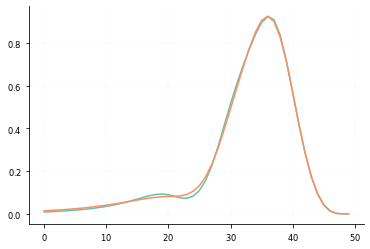

In [47]:
plt.plot(jnp.einsum("i,ijk->jk", get_params(opt_state), INPUT_GRID)[5, :])
plt.plot(INPUT_GRID[0, 5,:])

In [257]:
convolution.FK_FLAVOURS

array(['photon', '\\Sigma', 'g', 'V', 'V3', 'V8', 'V15', 'V24', 'V35',
       'T3', 'T8', 'T15', 'T24', 'T35'], dtype='<U6')

In [216]:
len(chi2_contribs)

73

In [217]:
loss(get_params(opt_state), chi2_contribs)

Array(nan, dtype=float32)

In [ ]:
loss()

In [180]:
ii = iter(batch_stream())

In [16]:


cd = load_commondata(ds.commondata).with_cuts(ds.cuts)

central_value = jnp.array(cd.central_values)

covmat = covmats.covmat_from_systematics(cd, dataset_input=ds)



sqrt_covmat = jnp.array(covmats.sqrt_covmat(covmat))

jnp.sum(jla.solve_triangular(sqrt_covmat, central_value, lower=True)**2)





No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Array(43581.004, dtype=float32)

In [191]:
next(ii)

[<PjitFunction of <function make_chi2.<locals>.chi2 at 0x7fa188021940>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9badeea160>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9d2d025a60>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9e01c2b790>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9bade95160>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9bade67ca0>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9badee85e0>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9badef3040>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9d23cdb700>>,
 <PjitFunction of <function make_chi2.<locals>.chi2 at 0x7f9badec5ee0>>]

In [101]:
covmats.systematics_matrix_from_commondata??

In [56]:
a = np.random.rand(len(covmat))

In [67]:
import scipy.linalg as la

In [68]:
a@la.inv(covmat)@a

76949.52986563856

In [98]:
jnp.sum(jla.solve_triangular(sqrt_covmat, a, lower=True)**2)

Array(76949.53, dtype=float32)

In [69]:
from validphys.calcutils import calc_chi2

In [70]:
calc_chi2(la.cholesky(covmat, lower=True), a)

76949.52986563857

In [74]:
calc_chi2(covmats.sqrt_covmat(covmat), a)

76949.52986563857

In [76]:
sm = covmats.systematics_matrix_from_commondata(cd, ds)

In [77]:
sm.shape

(121, 226)

In [80]:
q,r = la.qr(sm)

In [81]:
q

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [86]:
la.solve_triangular(r, a)

ValueError: expected square matrix

In [88]:
import matplotlib.pyplot as plt

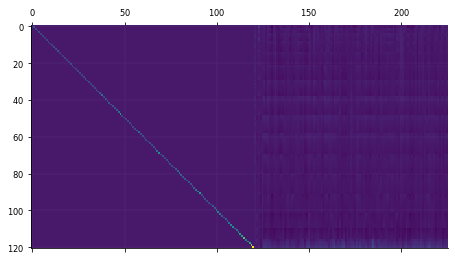

In [90]:
plt.matshow(q@r)

In [66]:
la.cholesky??

In [ ]:
from val

In [48]:
covmat

array([[ 2.68593312e-04,  1.83984561e-04,  7.67906773e-05, ...,
        -7.63211469e-05, -1.05104702e-04, -1.37744623e-04],
       [ 1.83984561e-04,  4.04746250e-04,  6.08510678e-05, ...,
        -1.27447854e-04, -1.71832192e-04, -2.22663390e-04],
       [ 7.67906773e-05,  6.08510678e-05,  1.91100734e-04, ...,
         1.14004879e-04,  1.45105124e-04,  1.87405121e-04],
       ...,
       [-7.63211469e-05, -1.27447854e-04,  1.14004879e-04, ...,
         2.33261176e-03,  1.15595913e-03,  1.43098653e-03],
       [-1.05104702e-04, -1.71832192e-04,  1.45105124e-04, ...,
         1.15595913e-03,  4.07094629e-03,  1.80012082e-03],
       [-1.37744623e-04, -2.22663390e-04,  1.87405121e-04, ...,
         1.43098653e-03,  1.80012082e-03,  6.43026459e-03]])

In [42]:
covmat_from_systematics??

In [23]:
cd.central_values

entry
46     0.9734
47     0.9821
59     0.9716
60     0.9817
61     0.9942
        ...  
256    0.6717
257    0.7194
258    0.6959
259    0.7020
260    0.7724
Name: data, Length: 121, dtype: float64

LHAPDF 6.4.0 loading /home/zah/anaconda3/envs/nnpdfdev/share/LHAPDF/NNPDF40_nlo_as_01180/NNPDF40_nlo_as_01180_0000.dat
NNPDF40_nlo_as_01180 PDF set, member #0, version 1


In [318]:
pdf_base.shape

(14, 50)

In [319]:
vals.shape

(14, 50)

In [320]:
loss(vals, chi2_contribs)

Array(5888.8696, dtype=float32)

In [157]:
def loss(nn):
    return nn - vals

In [158]:
vals.shape

(1, 14, 50)

In [159]:
tb = load_fktable(ds.fkspecs[0])

In [160]:
tb.luminosity_mapping

array([ 1,  1,  1,  2,  1,  3,  1,  4,  1,  5,  1,  6,  1,  9,  1, 10,  1,
       11,  2,  2,  2,  3,  2,  4,  2,  5,  2,  6,  2,  9,  2, 10,  2, 11,
        3,  3,  3,  4,  3,  5,  3,  6,  3,  9,  3, 10,  3, 11,  4,  4,  4,
        5,  4,  6,  4,  9,  4, 10,  4, 11,  5,  5,  5,  6,  5,  9,  5, 10,
        5, 11,  6,  6,  6,  9,  6, 10,  6, 11,  9,  9,  9, 10,  9, 11, 10,
       10, 10, 11, 11, 11])

In [162]:
tb.get_np_fktable().shape

(17, 45, 50, 50)

In [163]:
from jax.example_libraries import stax

In [183]:
init, predict = stax.serial(stax.Dense((2)), stax.Dense((3)))

In [184]:
from jax import random

In [185]:
rng = random.PRNGKey(3)

In [188]:
init(rng, (1,))

((3,),
 [(Array([[-0.99891424,  0.79900575]], dtype=float32),
   Array([0.01032689, 0.01061993], dtype=float32)),
  (Array([[-0.97583795, -0.5411103 , -0.47663605],
          [-1.1263915 , -0.7123102 , -1.2609658 ]], dtype=float32),
   Array([-0.0023886 , -0.00962158,  0.01378133], dtype=float32))])

In [189]:
import numpy as np

In [192]:
initial = np.random.rand(50)

In [193]:
import matplotlib.pyplot as plt

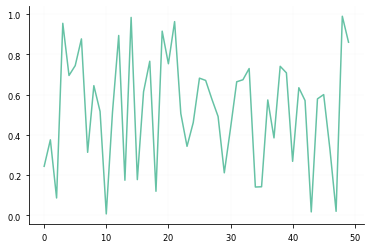

In [194]:
plt.plot(initial)

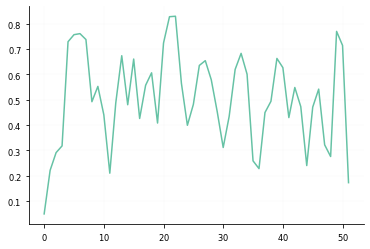

In [197]:
plt.plot(np.convolve(initial, [0.2, 0.6, 0.2]))

In [370]:
from jax.example_libraries import stax

In [373]:
pdf_base.shape

(14, 50)

In [379]:
init, apply = stax.Conv(1, (1,10))

In [380]:
stax.Conv??

In [382]:
init??

In [384]:
init(rng, (14,50,1))

IndexError: tuple index out of range

In [385]:
%debug

> /home/zah/anaconda3/envs/nnpdfdev/lib/python3.9/site-packages/jax/example_libraries/stax.py(76)<listcomp>()
     74     filter_shape_iter = iter(filter_shape)
     75     kernel_shape = [out_chan if c == 'O' else
---> 76                     input_shape[lhs_spec.index('C')] if c == 'I' else
     77                     next(filter_shape_iter) for c in rhs_spec]
     78     output_shape = lax.conv_general_shape_tuple(

ipdb> lhs_spec
'NHWC'
ipdb> q


In [393]:
@jax.jit
def f(obj):
    return obj["inte"]

In [394]:
class X:
    inte = 1

In [395]:
f({"inte":1})

Array(1, dtype=int32, weak_type=True)